In [2]:
# 2 linear_model.LogisticRegression

In [3]:
'''class sklearn.linear_model.LogisticRegression (penalty=’l2’, dual=False, tol=0.0001, C=1.0,
fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver=’warn’, max_iter=100,
multi_class=’warn’, verbose=0, warm_start=False, n_jobs=None)'''

'class sklearn.linear_model.LogisticRegression (penalty=’l2’, dual=False, tol=0.0001, C=1.0,\nfit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver=’warn’, max_iter=100,\nmulti_class=’warn’, verbose=0, warm_start=False, n_jobs=None)'

In [4]:
# 2.2 重要参数penalty & C

In [5]:
# 2.2.1 正则化

In [6]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [7]:
data = load_breast_cancer()
X = data.data
y = data.target

In [8]:
data.data.shape

(569, 30)

In [9]:
lrl1 = LR(penalty="l1",solver="liblinear",C=0.5,max_iter=1000)

In [10]:
lrl2 = LR(penalty="l2",solver="liblinear",C=0.5,max_iter=1000) 

In [11]:
#逻辑回归的重要属性coef_，查看每个特征所对应的参数
lrl1 = lrl1.fit(X,y)

In [12]:
lrl1.coef_

array([[ 4.01320665,  0.03214982, -0.13884799, -0.01623861,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.50561624,  0.        , -0.07128315,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.24612103, -0.12876681, -0.01439637,  0.        ,
         0.        , -2.02628098,  0.        ,  0.        ,  0.        ]])

In [13]:
(lrl1.coef_ != 0).sum(axis=1)#不为0的特征个数

array([10])

In [14]:
lrl2 = lrl2.fit(X,y)
lrl2.coef_

array([[ 1.61543234e+00,  1.02284415e-01,  4.78483684e-02,
        -4.43927107e-03, -9.42247882e-02, -3.01420673e-01,
        -4.56065677e-01, -2.22346063e-01, -1.35660484e-01,
        -1.93917198e-02,  1.61646580e-02,  8.84531037e-01,
         1.20301273e-01, -9.47422278e-02, -9.81687769e-03,
        -2.37399092e-02, -5.71846204e-02, -2.70190106e-02,
        -2.77563737e-02,  1.98122260e-04,  1.26394730e+00,
        -3.01762592e-01, -1.72784162e-01, -2.21786411e-02,
        -1.73339657e-01, -8.79070550e-01, -1.16325561e+00,
        -4.27661014e-01, -4.20612369e-01, -8.69820058e-02]])

In [27]:
(lrl2.coef_ != 0).sum(axis=1)#不为0的特征个数

array([30])

In [28]:
np.linspace(0.05,1,19)#以0.05为起始1为结束终点，随机生成19个数

array([0.05      , 0.10277778, 0.15555556, 0.20833333, 0.26111111,
       0.31388889, 0.36666667, 0.41944444, 0.47222222, 0.525     ,
       0.57777778, 0.63055556, 0.68333333, 0.73611111, 0.78888889,
       0.84166667, 0.89444444, 0.94722222, 1.        ])

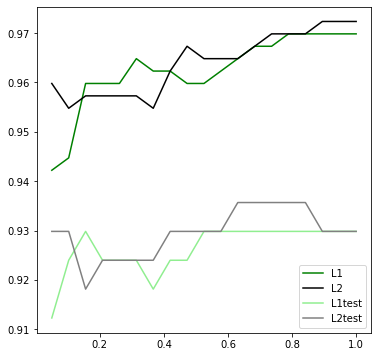

In [31]:
l1 = []
l2 = []
l1test = []
l2test = []
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

for i in np.linspace(0.05,1,19):
    lrl1 = LR(penalty="l1",solver="liblinear",C=i,max_iter=1000)
    lrl2 = LR(penalty="l2",solver="liblinear",C=i,max_iter=1000)

    lrl1 = lrl1.fit(Xtrain,Ytrain)
    l1.append(accuracy_score(lrl1.predict(Xtrain),Ytrain))
    l1test.append(accuracy_score(lrl1.predict(Xtest),Ytest))
    lrl2 = lrl2.fit(Xtrain,Ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain))
    l2test.append(accuracy_score(lrl2.predict(Xtest),Ytest))
graph = [l1,l2,l1test,l2test]
color = ["green","black","lightgreen","gray"]
label = ["L1","L2","L1test","L2test"]
plt.figure(figsize=(6,6))
for i in range(len(graph)):
    plt.plot(np.linspace(0.05,1,19),graph[i],color[i],label=label[i])
plt.legend(loc=4) #图例的位置在哪里?4表示，右下角
plt.show()

In [1]:
#2.2.2 逻辑回归中的特征工程

In [2]:
#embedded高效的嵌入法

In [3]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel

data = load_breast_cancer()
data.data.shape

(569, 30)

In [4]:
LR_ = LR(solver="liblinear",C=0.9,random_state=420)
cross_val_score(LR_,data.data,data.target,cv=10).mean()

0.9490601503759398

In [8]:
X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
X_embedded.shape
cross_val_score(LR_,X_embedded,data.target,cv=10).mean()

0.9368107769423559

In [21]:
# 1. 调节SelectFromModel这个类中的参数threshold，这是嵌入法的阈值，表示删除所有参数的绝对值低于这个阈
# 值的特征。现在threshold默认为None，所以SelectFromModel只根据L1正则化的结果来选择了特征，即选择了所
# 有L1正则化后参数不为0的特征。

In [22]:
LR_.fit(data.data,data.target).coef_

array([[ 2.07048221,  0.1154582 , -0.06572266, -0.00245965, -0.14486829,
        -0.39638842, -0.62494304, -0.32389706, -0.21170389, -0.02578883,
        -0.01342114,  1.22389926,  0.04241081, -0.09678267, -0.01564812,
        -0.00450805, -0.05397135, -0.03838264, -0.04045296,  0.00474944,
         1.31753414, -0.33994971, -0.12764503, -0.02465887, -0.26788259,
        -1.13329567, -1.55326678, -0.6238873 , -0.65198808, -0.11382362]])

In [20]:
abs((LR_.fit(data.data,data.target).coef_)).max() #选择其中绝对值最大的

2.070482209592794

In [26]:
fullx = []
fsx = []
threshold = np.linspace(0,abs((LR_.fit(data.data,data.target).coef_)).max(),20) 
threshold

array([0.        , 0.10897275, 0.2179455 , 0.32691824, 0.43589099,
       0.54486374, 0.65383649, 0.76280924, 0.87178198, 0.98075473,
       1.08972748, 1.19870023, 1.30767297, 1.41664572, 1.52561847,
       1.63459122, 1.74356397, 1.85253671, 1.96150946, 2.07048221])

(0.0, 30)
(0.10897274787330495, 17)
(0.2179454957466099, 12)
(0.32691824361991484, 10)
(0.4358909914932198, 8)
(0.5448637393665248, 8)
(0.6538364872398297, 5)
(0.7628092351131347, 5)
(0.8717819829864396, 5)
(0.9807547308597445, 5)
(1.0897274787330495, 5)
(1.1987002266063544, 4)
(1.3076729744796594, 3)
(1.4166457223529643, 2)
(1.5256184702262694, 2)
(1.6345912180995743, 1)
(1.7435639659728792, 1)
(1.8525367138461841, 1)
(1.961509461719489, 1)
(2.070482209592794, 1)


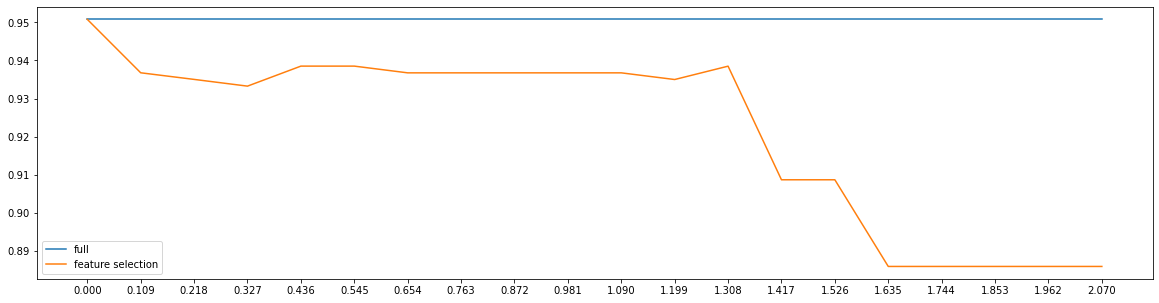

In [27]:
k=0
for i in threshold:
    X_embedded = SelectFromModel(LR_,threshold=i).fit_transform(data.data,data.target)
    fullx.append(cross_val_score(LR_,data.data,data.target,cv=5).mean())
    fsx.append(cross_val_score(LR_,X_embedded,data.target,cv=5).mean())
    print((threshold[k],X_embedded.shape[1]))
    k+=1
    
plt.figure(figsize=(20,5))
plt.plot(threshold,fullx,label="full")
plt.plot(threshold,fsx,label="feature selection")
plt.xticks(threshold)
plt.legend()
plt.show()

In [ ]:
# 2.第二种调整方法，是调逻辑回归的类LR_，通过画C的学习曲线来实现

In [32]:
fullx = []
fsx = []
C=np.arange(0.01,10.01,0.5)

In [33]:
C

array([0.01, 0.51, 1.01, 1.51, 2.01, 2.51, 3.01, 3.51, 4.01, 4.51, 5.01,
       5.51, 6.01, 6.51, 7.01, 7.51, 8.01, 8.51, 9.01, 9.51])

0.9561090225563911 7.01


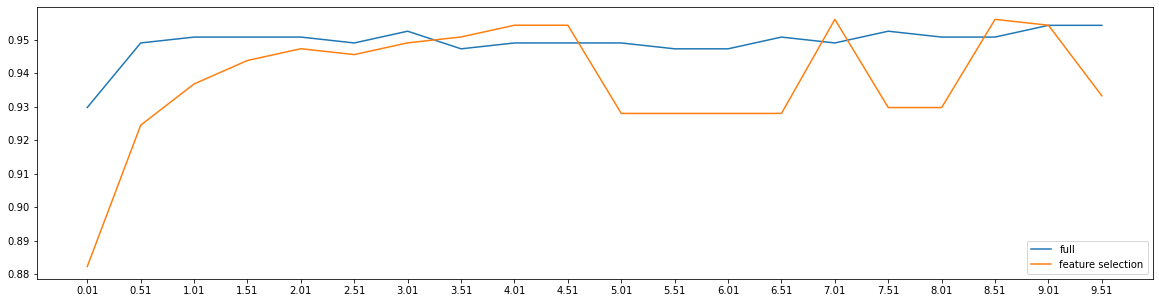

In [34]:
for i in C:
    LR_ = LR(solver="liblinear",C=i,random_state=420)
    fullx.append(cross_val_score(LR_,data.data,data.target,cv=10).mean())
    
    X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
    fsx.append(cross_val_score(LR_,X_embedded,data.target,cv=10).mean())
    
print(max(fsx),C[fsx.index(max(fsx))])

plt.figure(figsize=(20,5))
plt.plot(C,fullx,label="full")
plt.plot(C,fsx,label="feature selection")
plt.xticks(C)
plt.legend()
plt.show()

0.9561090225563911 6.069999999999999


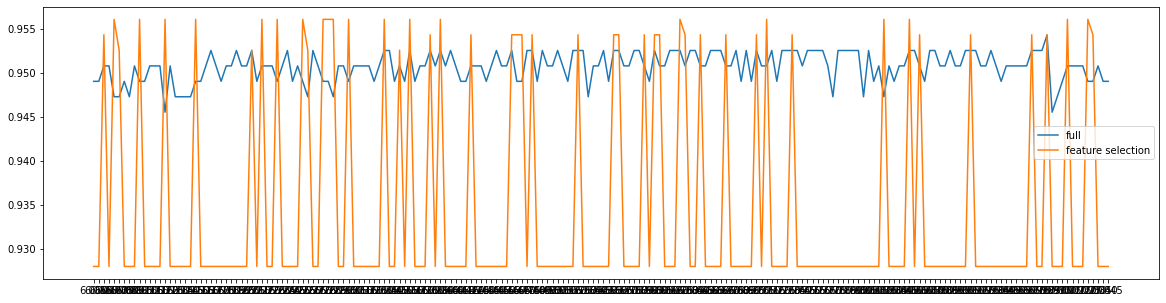

In [35]:
#细化学习曲线
fullx = []
fsx = []
C=np.arange(6.05,7.05,0.005)
for i in C:
    LR_ = LR(solver="liblinear",C=i,random_state=420)

    fullx.append(cross_val_score(LR_,data.data,data.target,cv=10).mean())

    X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
    fsx.append(cross_val_score(LR_,X_embedded,data.target,cv=10).mean())

print(max(fsx),C[fsx.index(max(fsx))])
plt.figure(figsize=(20,5))
plt.plot(C,fullx,label="full")
plt.plot(C,fsx,label="feature selection")
plt.xticks(C)
plt.legend()
plt.show()

In [38]:
#验证模型效果：降维之前
LR_ = LR(solver="liblinear",C=6.069999999999999,random_state=420)
cross_val_score(LR_,data.data,data.target,cv=10).mean()

0.9473057644110275

In [39]:
#验证模型效果：降维之后
LR_ = LR(solver="liblinear",C=6.069999999999999,random_state=420)
X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
cross_val_score(LR_,X_embedded,data.target,cv=10).mean()

0.9561090225563911

In [37]:
X_embedded.shape

(569, 11)